<a href="https://colab.research.google.com/github/StingrayS7/StingrayS7_/blob/main/practical_work_1%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from requests import get
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
response = get("https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv")
with open('fake_news.csv', 'wb') as f:
    f.write(response.content)

Точности предсказания 93.05 %
              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       638
        REAL       0.93      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



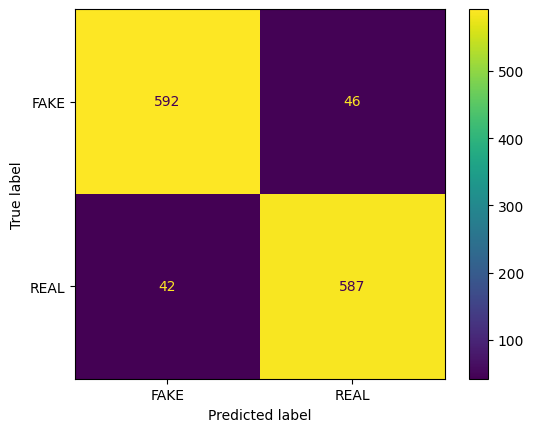

In [5]:
dataset = pd.read_csv('fake_news.csv')

X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset.label, test_size=0.2, random_state=7)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

y_pred = pac.predict(tfidf_test)

# Точности предсказания
accuracy = accuracy_score(y_test,y_pred)
print(f'Точности предсказания {round(accuracy * 100,2)} %')

# Отчет классификации
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(classification_report(y_test, y_pred))

# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred, labels=pac.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pac.classes_)
disp.plot()
plt.show()